In [1]:
import numpy as np
from matplotlib import pyplot as plt
import astropy.units as u
from astropy.time import Time
from astroplan import Observer
from astropy.coordinates import SkyCoord, EarthLocation, AltAz
import pandas as pd
#from __future__ import (absolute_import, division, print_function, unicode_literals)
from astropy.coordinates import get_moon, get_sun, solar_system_ephemeris, angular_separation



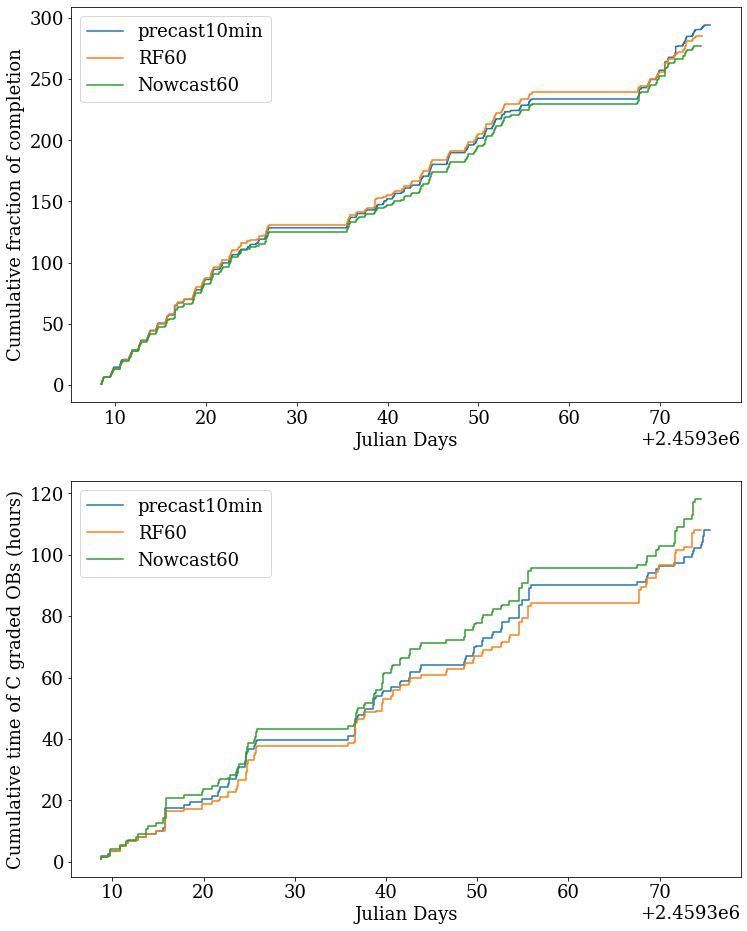

In [2]:
timearr=[]
cumulativesumarr=[]
cummulativesum=0
timearr_mustrepeat=[]
cumulativesumarr_mustrepeat=[]
cummulativesum_mustrepeat=0



f=open('observing_log_precast.txt','r')
#f=open('observing_log_RF.txt','r')
for line in f:
    line=line.split(',')
 
    if line[0]!='IDLE' and line[0]!='ChangeOfFocus' and line[0]!= 'NO_SERVICE_OPERATION' and line[0]!='DIMM_not_available' and line[7]=='FORS2': # and (line[13].strip()=='A' or line[13].strip()=='B'):
        #if ((line[13]=='A') or (line[13]=='B')):
        tend=line[2]
        tendjd=Time(tend, format='isot', scale='utc').to_value('jd')

        duration=float(line[3])
        grstatus=line[4]
        grgrade=line[5]
        
        if grstatus=='C':
            cummulativesum=cummulativesum+duration
            timearr.append(tendjd)
            cumulativesumarr.append(cummulativesum/3600)

        if grstatus=='M':
            cummulativesum_mustrepeat=cummulativesum_mustrepeat+duration
            timearr_mustrepeat.append(tendjd)
            cumulativesumarr_mustrepeat.append(cummulativesum_mustrepeat/3600)


    #f.write(str(ob_id[index])+','+str(Time(targstartjd, format='jd', scale='utc').to_value('isot'))+','+str( Time(targendjd, format='jd', scale='utc').to_value('isot'))+','+str( execution_time[index])+','+str( grstatus)+','+str( grgrade)+','+str( seeing[index])+','+str( instr)+','+str( targAirmassAtEnd)+','+str( aboveAreqdurationfrac)+','+str( aboveBreqdurationfrac)+','+str( dimmavg)+','+str( precast10minf) +'\n' )
f.close()





timearrRF=[]
cumulativesumarrRF=[]
cummulativesumRF=0
timearrRF_mustrepeat=[]
cumulativesumarrRF_mustrepeat=[]
cummulativesumRF_mustrepeat=0

#f=open('observing_log.txt','r')
f=open('observing_log_RF.txt','r')
for line in f:
    line=line.split(',')

    #3272538,2021-04-02T06:33:49.658,2021-04-02T07:32:08.658,3499.0,C,A,1.9,KMOS,1.3768469977902964,0.0,0.0,0.85,0.9,A
    
    if line[0]!='IDLE' and line[0]!='ChangeOfFocus' and line[0]!= 'NO_SERVICE_OPERATION' and line[0]!='DIMM_not_available':# and (line[13].strip()=='A' or line[13].strip()=='B'):

        #print (line[13])

        tend=line[2]
        tendjd=Time(tend, format='isot', scale='utc').to_value('jd')

        duration=float(line[3])
        grstatus=line[4]
        grgrade=line[5]
        
        if grstatus=='C':
            cummulativesumRF=cummulativesumRF+duration
            timearrRF.append(tendjd)
            cumulativesumarrRF.append(cummulativesumRF/3600)

        if grstatus=='M':
            cummulativesumRF_mustrepeat=cummulativesumRF_mustrepeat+duration
            timearrRF_mustrepeat.append(tendjd)
            cumulativesumarrRF_mustrepeat.append(cummulativesumRF_mustrepeat/3600)

    #f.write(str(ob_id[index])+','+str(Time(targstartjd, format='jd', scale='utc').to_value('isot'))+','+str( Time(targendjd, format='jd', scale='utc').to_value('isot'))+','+str( execution_time[index])+','+str( grstatus)+','+str( grgrade)+','+str( seeing[index])+','+str( instr)+','+str( targAirmassAtEnd)+','+str( aboveAreqdurationfrac)+','+str( aboveBreqdurationfrac)+','+str( dimmavg)+','+str( precast10minf) +'\n' )
f.close()







timearr_nowcast60=[]
cumulativesumarr_nowcast60=[]
cummulativesum_nowcast60=0
timearr_nowcast60_mustrepeat=[]
cumulativesumarr_nowcast60_mustrepeat=[]
cummulativesum_nowcast60_mustrepeat=0

#f=open('observing_log.txt','r')
f=open('observing_log_nowcast60.txt','r')
for line in f:
    line=line.split(',')

    if line[0]!='IDLE' and line[0]!='ChangeOfFocus' and line[0]!= 'NO_SERVICE_OPERATION' and line[0]!='DIMM_not_available':

        tend=line[2]
        tendjd=Time(tend, format='isot', scale='utc').to_value('jd')

        duration=float(line[3])
        grstatus=line[4]
        grgrade=line[5]

        if grstatus=='C':
            cummulativesum_nowcast60=cummulativesum_nowcast60+duration
            timearr_nowcast60.append(tendjd)
            cumulativesumarr_nowcast60.append(cummulativesum_nowcast60/3600)

        if grstatus=='M':
            cummulativesum_nowcast60_mustrepeat=cummulativesum_nowcast60_mustrepeat+duration
            timearr_nowcast60_mustrepeat.append(tendjd)
            cumulativesumarr_nowcast60_mustrepeat.append(cummulativesum_nowcast60_mustrepeat/3600)

    #f.write(str(ob_id[index])+','+str(Time(targstartjd, format='jd', scale='utc').to_value('isot'))+','+str( Time(targendjd, format='jd', scale='utc').to_value('isot'))+','+str( execution_time[index])+','+str( grstatus)+','+str( grgrade)+','+str( seeing[index])+','+str( instr)+','+str( targAirmassAtEnd)+','+str( aboveAreqdurationfrac)+','+str( aboveBreqdurationfrac)+','+str( dimmavg)+','+str( precast10minf) +'\n' )
f.close()





import numpy as np
import matplotlib.pyplot as plt



fig = plt.figure(figsize=(12,16))
#plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('font', size=18)
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
plt.rc('axes', labelsize=18)



#fig.subplots_adjust(hspace=0.0, wspace=0.0)

ax1=plt.subplot(211)
ax1.step(timearr, cumulativesumarr, label='precast10min')
ax1.step(timearrRF, cumulativesumarrRF, label='RF60')
ax1.step(timearr_nowcast60, cumulativesumarr_nowcast60, label='Nowcast60')

plt.xlabel('Julian Days')
plt.ylabel('Cumulative fraction of completion')
plt.legend()




ax1=plt.subplot(212)
ax1.step(timearr_mustrepeat, cumulativesumarr_mustrepeat, label='precast10min')
ax1.step(timearrRF_mustrepeat, cumulativesumarrRF_mustrepeat, label='RF60')
ax1.step(timearr_nowcast60_mustrepeat, cumulativesumarr_nowcast60_mustrepeat, label='Nowcast60')

plt.xlabel('Julian Days')
plt.ylabel('Cumulative time of C graded OBs (hours)')
plt.legend()


#plt.savefig('comparison2.pdf', dpi=300)
#plt.savefig('comparison2.png', dpi=300)
plt.show()



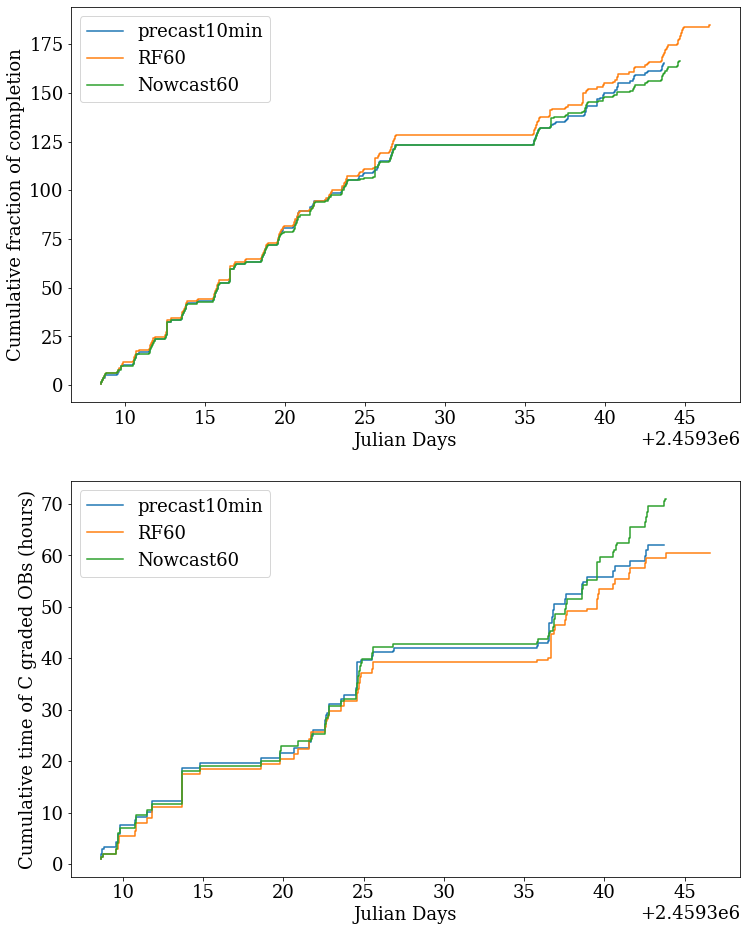

In [3]:
timearr=[]
cumulativesumarr=[]
cummulativesum=0
timearr_mustrepeat=[]
cumulativesumarr_mustrepeat=[]
cummulativesum_mustrepeat=0



f=open('observing_log_precast_2021.txt','r')
#f=open('observing_log_RF.txt','r')
for line in f:
    line=line.split(',')
 
    if line[0]!='IDLE' and line[0]!='ChangeOfFocus' and line[0]!= 'NO_SERVICE_OPERATION' and line[0]!='DIMM_not_available':# and (line[13].strip()=='A' or line[13].strip()=='B'):
        #if ((line[13]=='A') or (line[13]=='B')):
        tend=line[2]
        tendjd=Time(tend, format='isot', scale='utc').to_value('jd')

        duration=float(line[3])
        grstatus=line[4]
        grgrade=line[5]
        
        if grstatus=='C':
            cummulativesum=cummulativesum+duration
            timearr.append(tendjd)
            cumulativesumarr.append(cummulativesum/3600)

        if grstatus=='M':
            cummulativesum_mustrepeat=cummulativesum_mustrepeat+duration
            timearr_mustrepeat.append(tendjd)
            cumulativesumarr_mustrepeat.append(cummulativesum_mustrepeat/3600)


    #f.write(str(ob_id[index])+','+str(Time(targstartjd, format='jd', scale='utc').to_value('isot'))+','+str( Time(targendjd, format='jd', scale='utc').to_value('isot'))+','+str( execution_time[index])+','+str( grstatus)+','+str( grgrade)+','+str( seeing[index])+','+str( instr)+','+str( targAirmassAtEnd)+','+str( aboveAreqdurationfrac)+','+str( aboveBreqdurationfrac)+','+str( dimmavg)+','+str( precast10minf) +'\n' )
f.close()





timearrRF=[]
cumulativesumarrRF=[]
cummulativesumRF=0
timearrRF_mustrepeat=[]
cumulativesumarrRF_mustrepeat=[]
cummulativesumRF_mustrepeat=0

#f=open('observing_log.txt','r')
f=open('observing_log_RF_2021.txt','r')
for line in f:
    line=line.split(',')

    #3272538,2021-04-02T06:33:49.658,2021-04-02T07:32:08.658,3499.0,C,A,1.9,KMOS,1.3768469977902964,0.0,0.0,0.85,0.9,A
    
    if line[0]!='IDLE' and line[0]!='ChangeOfFocus' and line[0]!= 'NO_SERVICE_OPERATION' and line[0]!='DIMM_not_available':# and (line[13].strip()=='A' or line[13].strip()=='B'):

        #print (line[13])

        tend=line[2]
        tendjd=Time(tend, format='isot', scale='utc').to_value('jd')

        duration=float(line[3])
        grstatus=line[4]
        grgrade=line[5]
        
        if grstatus=='C':
            cummulativesumRF=cummulativesumRF+duration
            timearrRF.append(tendjd)
            cumulativesumarrRF.append(cummulativesumRF/3600)

        if grstatus=='M':
            cummulativesumRF_mustrepeat=cummulativesumRF_mustrepeat+duration
            timearrRF_mustrepeat.append(tendjd)
            cumulativesumarrRF_mustrepeat.append(cummulativesumRF_mustrepeat/3600)

    #f.write(str(ob_id[index])+','+str(Time(targstartjd, format='jd', scale='utc').to_value('isot'))+','+str( Time(targendjd, format='jd', scale='utc').to_value('isot'))+','+str( execution_time[index])+','+str( grstatus)+','+str( grgrade)+','+str( seeing[index])+','+str( instr)+','+str( targAirmassAtEnd)+','+str( aboveAreqdurationfrac)+','+str( aboveBreqdurationfrac)+','+str( dimmavg)+','+str( precast10minf) +'\n' )
f.close()







timearr_nowcast60=[]
cumulativesumarr_nowcast60=[]
cummulativesum_nowcast60=0
timearr_nowcast60_mustrepeat=[]
cumulativesumarr_nowcast60_mustrepeat=[]
cummulativesum_nowcast60_mustrepeat=0

#f=open('observing_log.txt','r')
f=open('observing_log_nowcast60_2021.txt','r')
for line in f:
    line=line.split(',')

    if line[0]!='IDLE' and line[0]!='ChangeOfFocus' and line[0]!= 'NO_SERVICE_OPERATION' and line[0]!='DIMM_not_available':

        tend=line[2]
        tendjd=Time(tend, format='isot', scale='utc').to_value('jd')

        duration=float(line[3])
        grstatus=line[4]
        grgrade=line[5]

        if grstatus=='C':
            cummulativesum_nowcast60=cummulativesum_nowcast60+duration
            timearr_nowcast60.append(tendjd)
            cumulativesumarr_nowcast60.append(cummulativesum_nowcast60/3600)

        if grstatus=='M':
            cummulativesum_nowcast60_mustrepeat=cummulativesum_nowcast60_mustrepeat+duration
            timearr_nowcast60_mustrepeat.append(tendjd)
            cumulativesumarr_nowcast60_mustrepeat.append(cummulativesum_nowcast60_mustrepeat/3600)

    #f.write(str(ob_id[index])+','+str(Time(targstartjd, format='jd', scale='utc').to_value('isot'))+','+str( Time(targendjd, format='jd', scale='utc').to_value('isot'))+','+str( execution_time[index])+','+str( grstatus)+','+str( grgrade)+','+str( seeing[index])+','+str( instr)+','+str( targAirmassAtEnd)+','+str( aboveAreqdurationfrac)+','+str( aboveBreqdurationfrac)+','+str( dimmavg)+','+str( precast10minf) +'\n' )
f.close()





import numpy as np
import matplotlib.pyplot as plt



fig = plt.figure(figsize=(12,16))
#plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('font', size=18)
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
plt.rc('axes', labelsize=18)



#fig.subplots_adjust(hspace=0.0, wspace=0.0)

ax1=plt.subplot(211)
ax1.step(timearr, cumulativesumarr, label='precast10min')
ax1.step(timearrRF, cumulativesumarrRF, label='RF60')
ax1.step(timearr_nowcast60, cumulativesumarr_nowcast60, label='Nowcast60')

plt.xlabel('Julian Days')
plt.ylabel('Cumulative fraction of completion')
plt.legend()




ax1=plt.subplot(212)
ax1.step(timearr_mustrepeat, cumulativesumarr_mustrepeat, label='precast10min')
ax1.step(timearrRF_mustrepeat, cumulativesumarrRF_mustrepeat, label='RF60')
ax1.step(timearr_nowcast60_mustrepeat, cumulativesumarr_nowcast60_mustrepeat, label='Nowcast60')

plt.xlabel('Julian Days')
plt.ylabel('Cumulative time of C graded OBs (hours)')
plt.legend()


#plt.savefig('comparison2.pdf', dpi=300)
#plt.savefig('comparison2.png', dpi=300)
plt.show()

